In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
from collections import Counter


In [4]:
wos_retracted_papers = pd.read_excel('./papers_abt_retractions/wos_search_retracted_paper_kw.xls')
wos_retracted_publications = pd.read_excel('./papers_abt_retractions/wos_search_retracted_publication_kw.xls')
wos_retracted_papers2 = pd.read_excel('./papers_abt_retractions/wos_search_retracted_paper_kw2.xls')
wos_search = pd.concat([wos_retracted_papers, wos_retracted_papers2, wos_retracted_publications])

In [5]:
wos_search.head()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"da Silva, JAT; Dobranszki, J",NaN,NaN,NaN,"da Silva, Jaime A. Teixeira; Dobranszki, Judit",NaN,NaN,Highly cited retracted papers,SCIENTOMETRICS,...,Science Citation Index Expanded (SCI-EXPANDED)...,Computer Science; Information Science & Librar...,EL0VI,NaN,NaN,NaN,NaN,2023-08-22,WOS:000394339500030,0
1,J,"Candal-Pedreira, C; Ross, JS; Ruano-Ravina, A;...",NaN,NaN,NaN,"Candal-Pedreira, Cristina; Ross, Joseph S.; Ru...",NaN,NaN,Retracted papers originating from paper mills:...,BMJ-BRITISH MEDICAL JOURNAL,...,Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,6T3GK,36442874.0,"hybrid, Green Published",NaN,NaN,2023-08-22,WOS:000893566800005,0
2,J,"Peng, H; Romero, DM; Horvat, EA",NaN,NaN,NaN,"Peng, Hao; Romero, Daniel M.; Horvat, Emoke-Agnes",NaN,NaN,Dynamics of cross-platform attention to retrac...,PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCE...,...,Science Citation Index Expanded (SCI-EXPANDED),Science & Technology - Other Topics,3R1VC,35700358.0,"hybrid, Green Submitted, Green Published",NaN,NaN,2023-08-22,WOS:000838706700008,0
3,J,"Shepperd, M; Yousefi, L",NaN,NaN,NaN,"Shepperd, Martin; Yousefi, Leila",NaN,NaN,An analysis of retracted papers in Computer Sc...,PLOS ONE,...,Science Citation Index Expanded (SCI-EXPANDED),Science & Technology - Other Topics,F8JN8,37159472.0,"Green Published, Green Submitted, gold",NaN,NaN,2023-08-22,WOS:000984757900018,0
4,J,"Bulow, W; Godskesen, TE; Helgesson, G; Eriksso...",NaN,NaN,NaN,"Bulow, William; Godskesen, Tove E.; Helgesson,...",NaN,NaN,Why unethical papers should be retracted,JOURNAL OF MEDICAL ETHICS,...,Science Citation Index Expanded (SCI-EXPANDED)...,Social Sciences - Other Topics; Medical Ethics...,XJ7MF,32792346.0,NaN,NaN,NaN,2023-08-22,WOS:000726966400031,0


In [6]:
wos_search.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2019 entries, 0 to 587
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Publication Type            2019 non-null   object 
 1   Authors                     2019 non-null   object 
 2   Book Authors                0 non-null      float64
 3   Book Editors                151 non-null    object 
 4   Book Group Authors          144 non-null    object 
 5   Author Full Names           2019 non-null   object 
 6   Book Author Full Names      0 non-null      float64
 7   Group Authors               8 non-null      object 
 8   Article Title               2019 non-null   object 
 9   Source Title                2019 non-null   object 
 10  Book Series Title           173 non-null    object 
 11  Book Series Subtitle        0 non-null      float64
 12  Language                    2019 non-null   object 
 13  Document Type               2019 non-nu

In [7]:
wos_search.drop_duplicates()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"da Silva, JAT; Dobranszki, J",NaN,NaN,NaN,"da Silva, Jaime A. Teixeira; Dobranszki, Judit",NaN,NaN,Highly cited retracted papers,SCIENTOMETRICS,...,Science Citation Index Expanded (SCI-EXPANDED)...,Computer Science; Information Science & Librar...,EL0VI,NaN,NaN,NaN,NaN,2023-08-22,WOS:000394339500030,0
1,J,"Candal-Pedreira, C; Ross, JS; Ruano-Ravina, A;...",NaN,NaN,NaN,"Candal-Pedreira, Cristina; Ross, Joseph S.; Ru...",NaN,NaN,Retracted papers originating from paper mills:...,BMJ-BRITISH MEDICAL JOURNAL,...,Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,6T3GK,36442874.0,"hybrid, Green Published",NaN,NaN,2023-08-22,WOS:000893566800005,0
2,J,"Peng, H; Romero, DM; Horvat, EA",NaN,NaN,NaN,"Peng, Hao; Romero, Daniel M.; Horvat, Emoke-Agnes",NaN,NaN,Dynamics of cross-platform attention to retrac...,PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCE...,...,Science Citation Index Expanded (SCI-EXPANDED),Science & Technology - Other Topics,3R1VC,35700358.0,"hybrid, Green Submitted, Green Published",NaN,NaN,2023-08-22,WOS:000838706700008,0
3,J,"Shepperd, M; Yousefi, L",NaN,NaN,NaN,"Shepperd, Martin; Yousefi, Leila",NaN,NaN,An analysis of retracted papers in Computer Sc...,PLOS ONE,...,Science Citation Index Expanded (SCI-EXPANDED),Science & Technology - Other Topics,F8JN8,37159472.0,"Green Published, Green Submitted, gold",NaN,NaN,2023-08-22,WOS:000984757900018,0
4,J,"Bulow, W; Godskesen, TE; Helgesson, G; Eriksso...",NaN,NaN,NaN,"Bulow, William; Godskesen, Tove E.; Helgesson,...",NaN,NaN,Why unethical papers should be retracted,JOURNAL OF MEDICAL ETHICS,...,Science Citation Index Expanded (SCI-EXPANDED)...,Social Sciences - Other Topics; Medical Ethics...,XJ7MF,32792346.0,NaN,NaN,NaN,2023-08-22,WOS:000726966400031,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,J,"Hohlfeld, A; Ebrahim, S; Shaik, MZ; Kredo, T",NaN,NaN,NaN,"Hohlfeld, Ameer; Ebrahim, Sumayyah; Shaik, Muh...",NaN,NaN,Circumcision devices versus standard surgical ...,COCHRANE DATABASE OF SYSTEMATIC REVIEWS,...,Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,RH9VR,33786810.0,Green Published,NaN,NaN,2023-08-22,WOS:000636560500007,0
583,J,"Hata, Y; Goto, H; Yoshimi, M",NaN,NaN,NaN,"Hata, Yoshiya; Goto, Hiroyuki; Yoshimi, Masayuki",NaN,NaN,RETRACTED: Preliminary Analysis of Strong Grou...,SEISMOLOGICAL RESEARCH LETTERS,...,Science Citation Index Expanded (SCI-EXPANDED),Geochemistry & Geophysics,DW7KY,NaN,NaN,NaN,NaN,2023-08-22,WOS:000383830800001,0
584,J,"Miyazaki, M; Hayano, R",NaN,NaN,NaN,"Miyazaki, Makoto; Hayano, Ryugo",NaN,NaN,RETRACTED: Individual external dose monitoring...,JOURNAL OF RADIOLOGICAL PROTECTION,...,Science Citation Index Expanded (SCI-EXPANDED),"Environmental Sciences & Ecology; Public, Envi...",EF5IK,27922832.0,"Green Submitted, hybrid",NaN,NaN,2023-08-22,WOS:000390363700001,0
586,J,"Reis, S; Metzendorf, MI; Kuehn, R; Popp, M; Ga...",NaN,NaN,NaN,"Reis, Stefanie; Metzendorf, Maria-Inti; Kuehn,...",NaN,NaN,Nirmatrelvir combined with ritonavir for preve...,COCHRANE DATABASE OF SYSTEMATIC REVIEWS,...,Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,5B6JY,36126225.0,"Green Published, Green Accepted",NaN,NaN,2023-08-22,WOS:000863675200004,0


In [8]:
#Load your DataFrame and preprocess the abstracts:

# Assuming your DataFrame has a column named 'abstract'
abstracts = wos_search['Abstract'].tolist()

# Preprocess abstracts by tokenizing and removing stopwords
stop_words = set(stopwords.words('english'))
abstracts_tokens = [nltk.word_tokenize(str(abstract).lower()) for abstract in abstracts]
abstracts_tokens = [[word for word in tokens if word.isalnum() and word not in stop_words] for tokens in abstracts_tokens]


In [9]:
#Generate bi-grams from the preprocessed abstracts:
abstracts_bigrams = [list(bigrams(tokens)) for tokens in abstracts_tokens]


In [10]:
#Count the frequency of each bi-gram:
all_bigrams = [bigram for abstract_bigrams in abstracts_bigrams for bigram in abstract_bigrams]
bigram_counts = Counter(all_bigrams)


In [11]:
#Get the most common bi-grams:
n_most_common = 20  # You can change this number to get more or fewer bi-grams
most_common_bigrams = bigram_counts.most_common(n_most_common)

least_common_bigrams = bigram_counts.most_common()[:-n_most_common-1:-1]

In [12]:
#Print or use the most common bi-grams:
for bigram, count in most_common_bigrams:
    print(' '.join(bigram), ':', count)


retracted articles : 284
retracted papers : 270
retracted publications : 220
rights reserved : 174
elsevier rights : 140
retraction notices : 119
paper presents : 110
reasons retraction : 103
scientific misconduct : 99
peer review : 98
et al : 97
95 ci : 97
published online : 96
papers retracted : 94
articles retracted : 86
wiley online : 83
online library : 83
retraction watch : 82
research misconduct : 79
retracted agreement : 79


In [13]:
for bigram, count in least_common_bigrams:
    print(' '.join(bigram), ':', count)

agricultural processes : 1
complexity agricultural : 1
within complexity : 1
crops within : 1
organisms crops : 1
genes organisms : 1
applied genes : 1
rights applied : 1
propert rights : 1
relationships propert : 1
expressing relationships : 1
equation expressing : 1
solve equation : 1
come solve : 1
time come : 1
involved time : 1
mixed property : 1
protecting mixed : 1
legal protecting : 1
operational legal : 1


In [14]:
wos_search['Document Type'].value_counts()

Document Type
Article                                            1078
Proceedings Paper                                   280
Article; Retracted Publication                      152
Retraction                                          122
Review                                               94
Article; Proceedings Paper                           62
News Item                                            58
Editorial Material                                   50
Correction                                           36
Letter                                               32
Article; Early Access                                26
Retraction; Early Access                              6
Letter; Retracted Publication                         3
Meeting Abstract                                      3
Proceedings Paper; Retracted Publication              3
Review; Early Access                                  3
Note                                                  2
Review; Retracted Publication     

In [15]:
filtered = wos_search[wos_search['Document Type'].str.contains('Retracted Publication')]
filtered['Article Title']


216    RETRACTED: Discussion of Testing Paper Design ...
440    RETRACTED: The Simple Analysis of Paper-cut ar...
477    RETRACTED: Sirt3 activation attenuated oxidize...
606    RETRACTED: A New Method of Paper Defect Recogn...
668    RETRACTED: An overview of recently published m...
                             ...                        
578    RETRACTED: Vitamin D Supplementation Affects t...
579    RETRACTED: High-dose omega-3 Fatty Acid Plus V...
580    RETRACTED: A highly concise and practical rout...
583    RETRACTED: Preliminary Analysis of Strong Grou...
584    RETRACTED: Individual external dose monitoring...
Name: Article Title, Length: 163, dtype: object

In [16]:
filtered[~filtered['Article Title'].str.contains('RETRACTED:')]


,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record


In [17]:
wos_search = wos_search[~wos_search['Document Type'].str.contains('Retracted Publication')]
wos_search = wos_search[~wos_search['Document Type'].str.contains('Retraction')]

In [18]:
wos_search

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"da Silva, JAT; Dobranszki, J",NaN,NaN,NaN,"da Silva, Jaime A. Teixeira; Dobranszki, Judit",NaN,NaN,Highly cited retracted papers,SCIENTOMETRICS,...,Science Citation Index Expanded (SCI-EXPANDED)...,Computer Science; Information Science & Librar...,EL0VI,NaN,NaN,NaN,NaN,2023-08-22,WOS:000394339500030,0
1,J,"Candal-Pedreira, C; Ross, JS; Ruano-Ravina, A;...",NaN,NaN,NaN,"Candal-Pedreira, Cristina; Ross, Joseph S.; Ru...",NaN,NaN,Retracted papers originating from paper mills:...,BMJ-BRITISH MEDICAL JOURNAL,...,Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,6T3GK,36442874.0,"hybrid, Green Published",NaN,NaN,2023-08-22,WOS:000893566800005,0
2,J,"Peng, H; Romero, DM; Horvat, EA",NaN,NaN,NaN,"Peng, Hao; Romero, Daniel M.; Horvat, Emoke-Agnes",NaN,NaN,Dynamics of cross-platform attention to retrac...,PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCE...,...,Science Citation Index Expanded (SCI-EXPANDED),Science & Technology - Other Topics,3R1VC,35700358.0,"hybrid, Green Submitted, Green Published",NaN,NaN,2023-08-22,WOS:000838706700008,0
3,J,"Shepperd, M; Yousefi, L",NaN,NaN,NaN,"Shepperd, Martin; Yousefi, Leila",NaN,NaN,An analysis of retracted papers in Computer Sc...,PLOS ONE,...,Science Citation Index Expanded (SCI-EXPANDED),Science & Technology - Other Topics,F8JN8,37159472.0,"Green Published, Green Submitted, gold",NaN,NaN,2023-08-22,WOS:000984757900018,0
4,J,"Bulow, W; Godskesen, TE; Helgesson, G; Eriksso...",NaN,NaN,NaN,"Bulow, William; Godskesen, Tove E.; Helgesson,...",NaN,NaN,Why unethical papers should be retracted,JOURNAL OF MEDICAL ETHICS,...,Science Citation Index Expanded (SCI-EXPANDED)...,Social Sciences - Other Topics; Medical Ethics...,XJ7MF,32792346.0,NaN,NaN,NaN,2023-08-22,WOS:000726966400031,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,J,"Mutter, TC; Ruth, CA; Dart, AB",NaN,NaN,NaN,"Mutter, Thomas C.; Ruth, Chelsea A.; Dart, All...",NaN,NaN,Hydroxyethyl starch (HES) versus other fluid t...,COCHRANE DATABASE OF SYSTEMATIC REVIEWS,...,Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,193OD,23881659.0,NaN,NaN,NaN,2023-08-22,WOS:000322568300017,0
582,J,"Hohlfeld, A; Ebrahim, S; Shaik, MZ; Kredo, T",NaN,NaN,NaN,"Hohlfeld, Ameer; Ebrahim, Sumayyah; Shaik, Muh...",NaN,NaN,Circumcision devices versus standard surgical ...,COCHRANE DATABASE OF SYSTEMATIC REVIEWS,...,Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,RH9VR,33786810.0,Green Published,NaN,NaN,2023-08-22,WOS:000636560500007,0
585,J,"Baird, E; Williams, ACD; Hearn, L; Amris, K",NaN,NaN,NaN,"Baird, Emma; Williams, Amanda C. de C.; Hearn,...",NaN,NaN,Interventions for treating persistent pain in ...,COCHRANE DATABASE OF SYSTEMATIC REVIEWS,...,Science Citation Index Expanded (SCI-EXPANDED)...,General & Internal Medicine,FF3QG,28820231.0,Green Published,NaN,NaN,2023-08-22,WOS:000408828100023,0
586,J,"Reis, S; Metzendorf, MI; Kuehn, R; Popp, M; Ga...",NaN,NaN,NaN,"Reis, Stefanie; Metzendorf, Maria-Inti; Kuehn,...",NaN,NaN,Nirmatrelvir combined with ritonavir for preve...,COCHRANE DATABASE OF SYSTEMATIC REVIEWS,...,Science Citation Index Expanded (SCI-EXPANDED),General & Internal Medicine,5B6JY,36126225.0,"Green Published, Green Accepted",NaN,NaN,2023-08-22,WOS:000863675200004,0


In [19]:
wos_search[wos_search['Document Type']=='Retraction']

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record


In [20]:
wos_search[wos_search['Article Title'].str.contains('RETRACTED:')]

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record


In [21]:
year_counts = wos_search[wos_search['Publication Year'] !=2023]['Publication Year'].value_counts().sort_index()


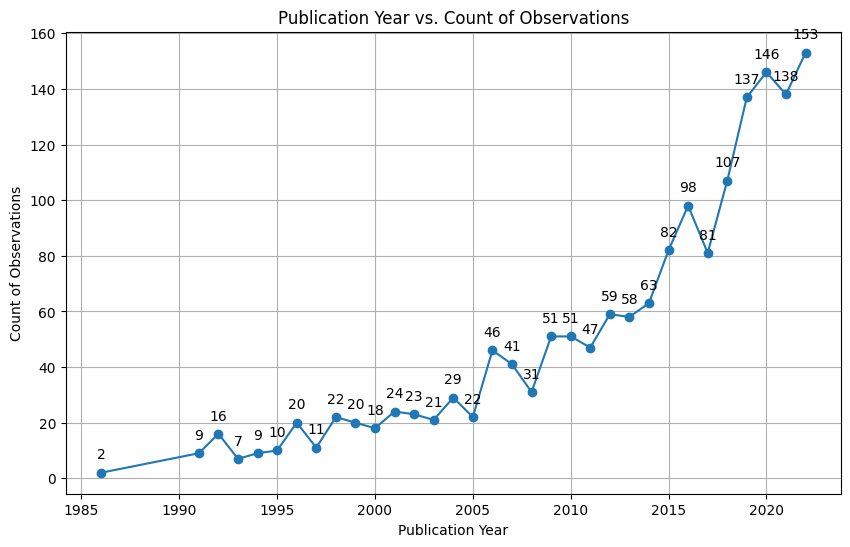

In [22]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(year_counts.index, year_counts.values, marker='o')

# Annotate each data point with its count
for year, count in zip(year_counts.index, year_counts.values):
    plt.annotate(str(count), (year, count), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Publication Year')
plt.ylabel('Count of Observations')
plt.title('Publication Year vs. Count of Observations')
plt.grid(True)
plt.show()


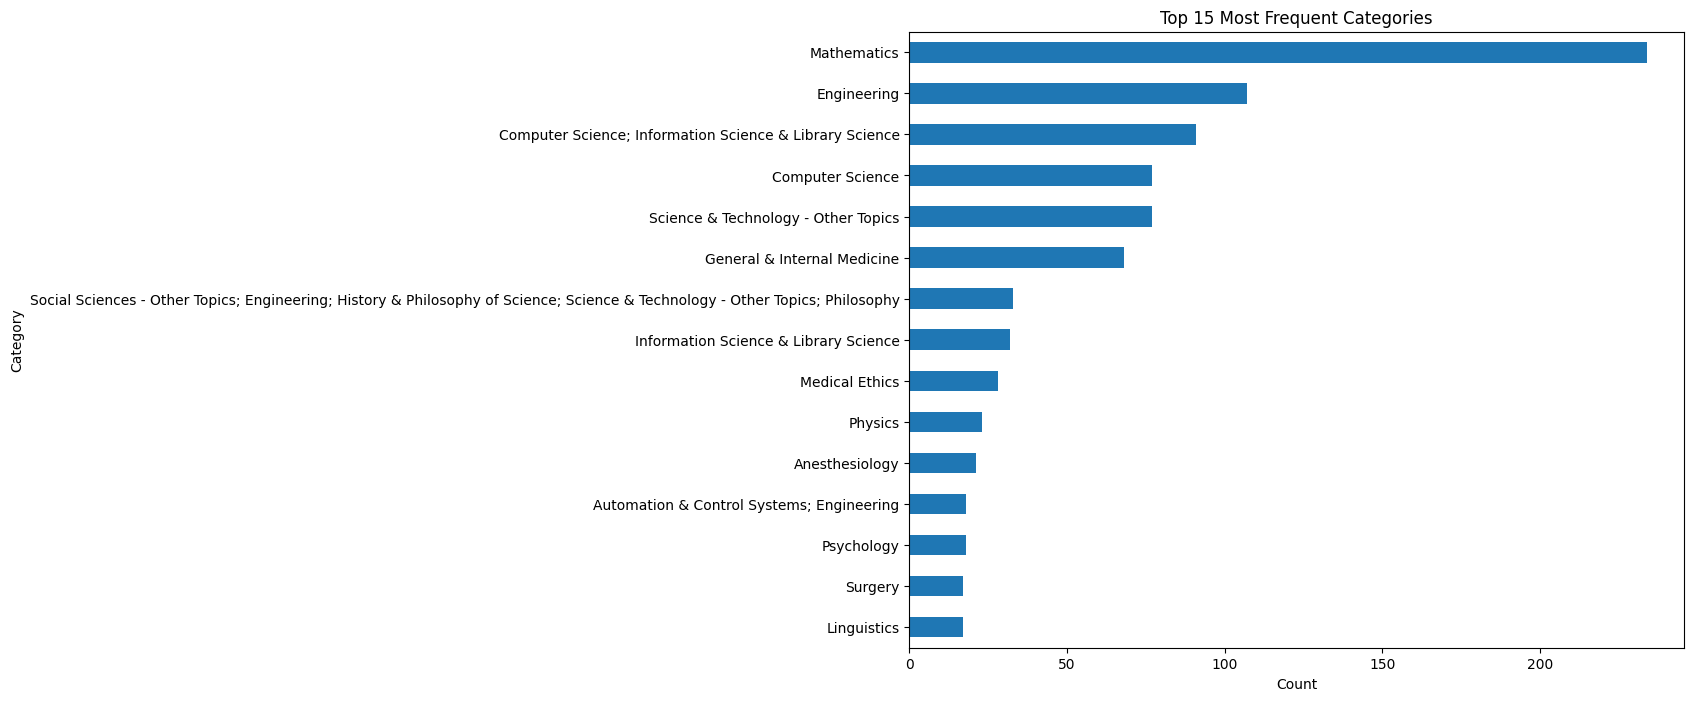

In [23]:
# Count the occurrences of each category
category_counts = wos_search['Research Areas'].value_counts().head(15)

# Create a bar chart
plt.figure(figsize=(10, 8))
category_counts.sort_values().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Top 15 Most Frequent Categories')
plt.show()

In [24]:
wos_search[wos_search['Research Areas'].str.contains('Computer Science', case=False, na=False)]['Article Title'][:30]

0                          Highly cited retracted papers
5      An analysis of Malaysian retracted papers: Mis...
7      Why do some retracted papers continue to be ci...
9      Partial citation analysis of five classes of r...
12     Retracted papers by Iranian authors: causes, j...
16     The anatomy of retracted papers in the Web of ...
21     Retracted Research Articles from the Retractio...
23     Citing a retracted paper: the case of Wakefiel...
25     Other than detecting impact in advance, altern...
29     Multiple versions of the h-index: cautionary u...
30     Team size and retracted citations reveal the p...
42                                Retractions in Science
65     A Multi-Dimensional Observation Framework of R...
67     An observation framework for retracted publica...
86     How do academia and society react to erroneous...
88     Post retraction citations in context: a case s...
109    Exploring perception of retraction based on me...
110    Testing the Keystone Fra